In [17]:
%load_ext autoreload
%autoreload 2
import sys
from pathlib import Path
from matplotlib.lines import Line2D
import math

sys.path.append(str(Path("..").resolve()))
from src import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# DCT vs FFT

In [18]:
dataset="neutrophils"

In [ ]:
import sys
sys.path.append("..")
from src import *

Recording("../dataset/zenodo/zebrafish/x.tif", max_frames=2000).render(
    "best/x.mp4", codec="libx265", bitrate=16000
)
Recording("../dataset/zenodo/zebrafish/gt.tif", max_frames=2000).render(
    "best/gt.mp4", codec="libx265", bitrate=16000
)

filename = "ftt_zebrafish_frame3000_alphas0.85_60-150"
Recording(np.load(f"results/zebrafish/{filename}.npy")).render(
    f"best/{filename}.mp4", end=2000, codec="libx264", bitrate=5000
)

In [21]:
editor = Editor()
zoom = 2.5
editor.compose(
    [
        {
            "Raw": f"best/{dataset}/x.mp4",
            "GroundTruth": f"best/{dataset}/gt.mp4",
        },
        {
            "DeepCAD": f"best/{dataset}/y.mp4",
            "FFT": f"best/{dataset}/fft.mp4",
        },
    ],
    f"{dataset}_{zoom}x.mp4",
    codec="libx265",
    bitrate=4500,
    duration=30,
    speed=1,
    zoom=zoom,
)

Moviepy - Building video neutrophils_2.5x.mp4.
Moviepy - Writing video neutrophils_2.5x.mp4



Moviepy - Done !
Moviepy - video ready neutrophils_2.5x.mp4


### 🎥 See [`dct_vs_fft.mp4`](dct_vs_fft.mp4)

## PSNR3D vs SSIM3D

### DCT vs FFT

In [13]:
def plot(df, height=6):
    _, ax1 = plt.subplots(figsize=(12, height))

    # plot PSNR
    df["PSNR (dB)"].plot(kind="barh", ax=ax1, color="tab:blue", position=1, width=0.3, label="PSNR (dB)")
    ax1.set_xlim(25, 35)
    ax1.set_xticks(range(25, 36, 1))
    ax1.set_xlabel("PSNR (dB)")

    ax2 = ax1.twiny()
    df["SSIM3D"].plot(kind="barh", ax=ax2, color="tab:orange", position=0, width=0.3, label="SSIM3D")
    ax2.set_xlim(0, 1)
    ax2.set_xticks([_ / 10 for _ in range(0, 11)])
    ax2.set_xlabel("SSIM3D")

    ax1.set_yticks(range(len(df)))
    ax1.set_yticklabels(df.index)
    ax1.set_title("Comparison of Denoising Methods")

    h1, l1 = ax1.get_legend_handles_labels()
    h2, l2 = ax2.get_legend_handles_labels()
    ax1.legend(h1 + h2, l1 + l2, loc="lower right")

    plt.tight_layout()
    plt.show()

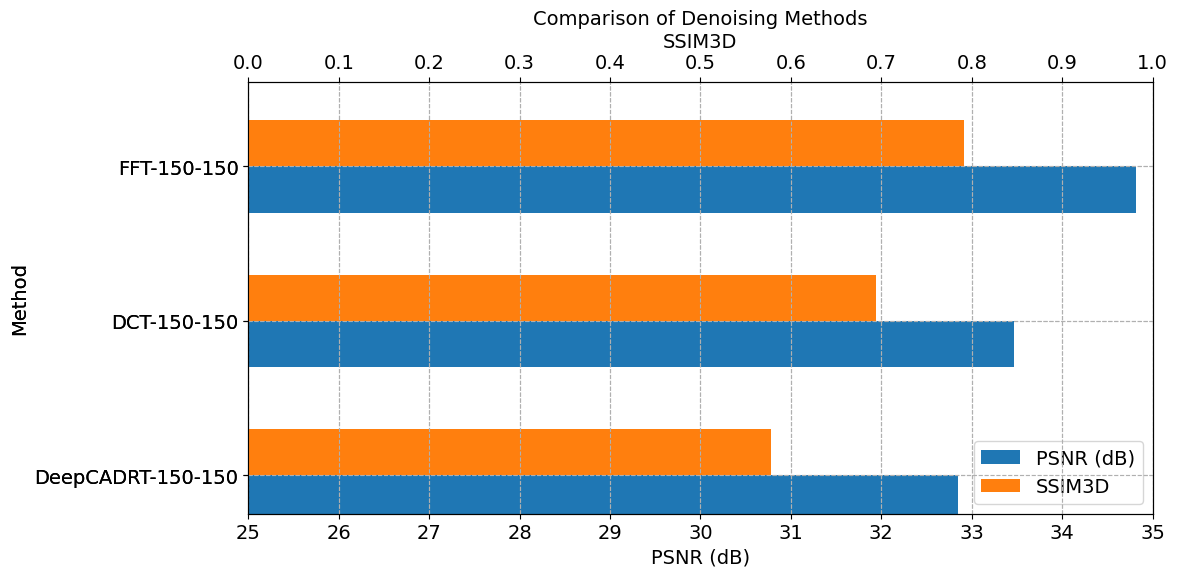

In [14]:
# DCT is frame3000_win6000_s036_δs72_t0
# FFT is frame3000_alphas0.85
df = pd.DataFrame(
    [
        ("DeepCADRT-150-150", 32.8495724, 0.578202),
        ("DCT-150-150", 33.471270, 0.69420),
        ("FFT-150-150", 34.814267, 0.791301),
    ],
    columns=["Method", "PSNR (dB)", "SSIM3D"],
).set_index("Method")
plot(df)

## DeepCAD vs FFT

In [72]:
def barchart(baseline_df, df, width=0.75):
    fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=False)

    # PSNR comparison
    axes[0].bar(baseline_df.index, baseline_df["PSNR"], label="DeepCAD", color="lightgray", width=width)
    axes[0].bar(
        df.index,
        df["PSNR"] - baseline_df["PSNR"],
        bottom=baseline_df["PSNR"],
        label="FFT",
        color="steelblue",
        width=width,
    )
    axes[0].set_ylim((25,36))
    axes[0].set_title("PSNR Comparison")
    axes[0].set_xlabel("Method")
    axes[0].set_ylabel("PSNR")
    axes[0].legend()

    # SSIM3D comparison
    axes[1].bar(baseline_df.index, baseline_df["SSIM3D"], label="DeepCAD", color="lightgray", width=width)
    axes[1].bar(
        df.index,
        df["SSIM3D"] - baseline_df["SSIM3D"],
        bottom=baseline_df["SSIM3D"],
        label="FFT",
        color="steelblue",
        width=width,
    )
    axes[1].set_ylim((0,1))
    axes[1].set_title("SSIM3D Comparison")
    axes[1].set_xlabel("Method")
    axes[1].set_ylabel("SSIM3D")
    axes[1].legend()

    plt.tight_layout()
    plt.show()

Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings 

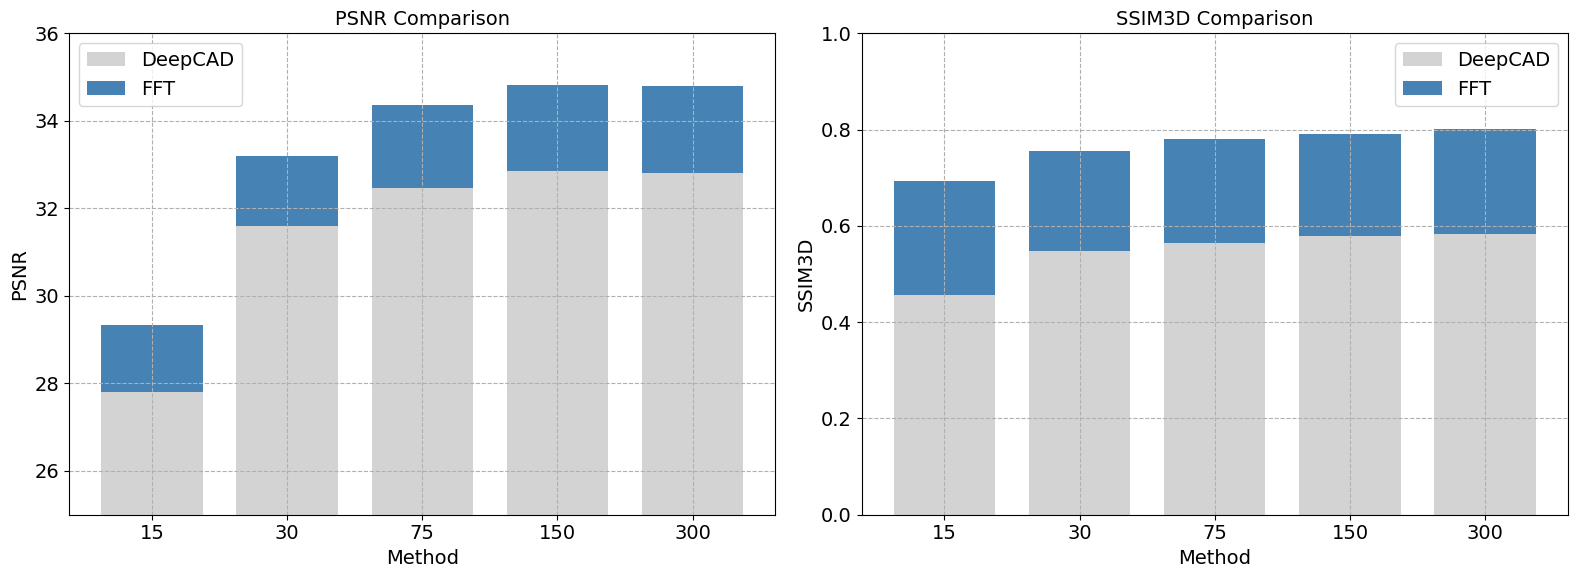

In [73]:
# ("DeepCADRT-300-150",32.7138, 0.5753220)
# ("FFT-300-150",34.64649, 0.793504)

# FFT is frame3000_alphas0.85
deepcad_df = pd.DataFrame(
    [
        ("15", 27.804, 0.4562536478),
        ("30", 31.6045103904, 0.5473683),
        ("75", 32.4733731, 0.563951),
        ("150", 32.8495724, 0.578202),
        ("300", 32.814922, 0.5822482),
    ],
    columns=["Method", "PSNR", "SSIM3D"],
).set_index("Method")
fft_df = pd.DataFrame(
    [
        ("15", 29.33049, 0.693118),
        ("30", 33.19490866, 0.75576096),
        ("75", 34.36992956, 0.780432),
        ("150", 34.814267, 0.791301),
        ("300", 34.807489, 0.80201),
    ],
    columns=["Method", "PSNR", "SSIM3D"],
).set_index("Method")
barchart(deepcad_df, fft_df, width=0.75)
# plot(deepcad_df, fft_df)